In [197]:
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.ldamodel import LdaModel

# import nltk

# NLTK Downloader required
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

import re
# from nltk.corpus import stopwords 
# from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer
# from nltk.stem import WordNetLemmatizer 
#remember to remove non-English characters

import pandas as pd
import numpy as np
#from matplotlib import pyplot as plt

import statistics
import math

from datetime import datetime
from time import mktime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler 

# import category_encoders as ce

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
# add other imports if needed

In [198]:
df= pd.read_csv('cardio_train.csv/cardio_train_seperated.csv', index_col= 0)
# df = pd.DataFrame(data)
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76,120,80,1,1,1,0,1,0
99995,22601,1,158,126,140,90,2,2,0,0,1,1
99996,19066,2,183,105,180,90,3,1,0,1,0,1


In [199]:
features = [ "age",	"gender", "height",	"weight", "ap_hi", "ap_lo", "cholesterol", "gluc",	"smoke", "alco", "active"]
X = df[features]
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [200]:
y_train.value_counts()


cardio
0    17510
1    17490
Name: count, dtype: int64

In [201]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

cardio
0    17510
1    17510
Name: count, dtype: int64

In [202]:
scaler = MinMaxScaler()
cols = X_train.columns.tolist()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [203]:
# Instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)
rforest = RandomForestClassifier(n_estimators = 20, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    min_child_weight=1, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    gamma=0,
    reg_alpha=0.001,
    reg_lambda=1,
    seed=42
)

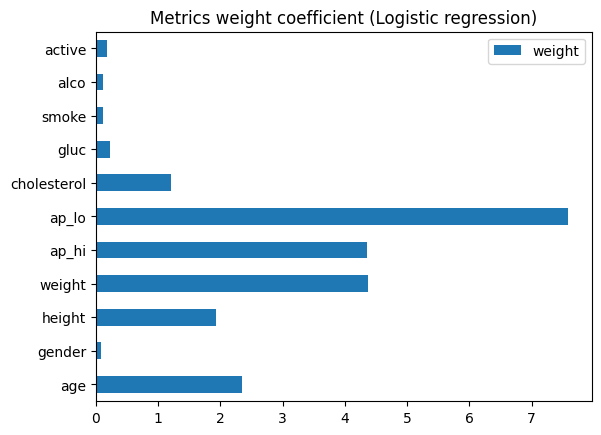

In [204]:
# Fit the model, use logreg for Logistic Regression and reg for Random Forest
logreg.fit(X_train, np.ravel(y_train))
coef = logreg.coef_[0]

data = []

for i in range(len(coef)):
    data.append(abs(coef[i]))
# from sklearn.preprocessing import normalize
# print(normalize([data]))

plotdf = pd.DataFrame(data, X_train.columns, columns=["weight"])
# plotdf.sort_values(by="weight", ascending=True, inplace=True)
plotdf.plot.barh(title="Metrics weight coefficient (Logistic regression)")
data = data[::-1]
df = pd.DataFrame(columns = ['Name', 'Articles', 'Improved'])

array([0.01351167, 0.00808544, 0.00901734, 0.01788936, 0.04114686,
       0.08335694, 0.1835388 , 0.17290623, 0.15727944, 0.01588516,
       0.29738276])

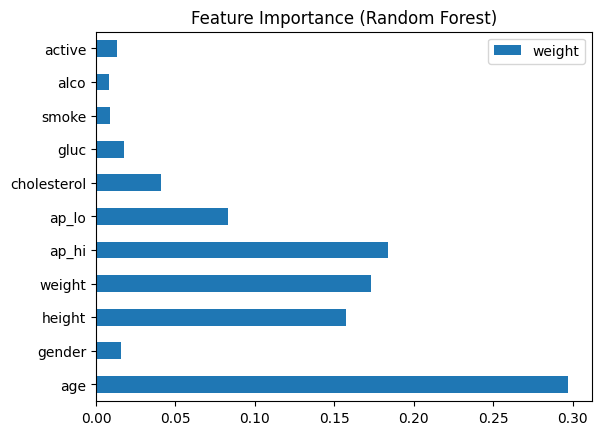

In [205]:
rforest.fit(X_train, np.ravel(y_train))

plotdfRF = pd.DataFrame(rforest.feature_importances_, index = X_train.columns, columns = ["weight"])
# plotdfRF.sort_values(by = "weight", ascending = True, inplace = True)
plotdfRF.plot.barh(title = "Feature Importance (Random Forest)")
rforest.feature_importances_[::-1]

In [206]:
xgb_clf.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [207]:
y_pred_test = xgb_clf.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test))

Model accuracy score: 0.7355
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     17511
           1       0.75      0.70      0.72     17489

    accuracy                           0.74     35000
   macro avg       0.74      0.74      0.74     35000
weighted avg       0.74      0.74      0.74     35000



In [208]:
# clf = RandomForestClassifier(random_state=42)


scores = cross_val_score(xgb_clf, X_train, np.ravel(y_train), cv=100)

xgb_clf.fit(X_train, np.ravel(y_train))

y_pred_test = xgb_clf.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test))

Model accuracy score: 0.7355
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     17511
           1       0.75      0.70      0.72     17489

    accuracy                           0.74     35000
   macro avg       0.74      0.74      0.74     35000
weighted avg       0.74      0.74      0.74     35000



In [209]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees (boosting rounds)
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 6, 10],  # Maximum depth of a tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight needed in a child
}

# Create a base model
# rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train a new model with the best parameters
best_clf = xgb.XGBClassifier(**best_params, seed=42)
best_clf.fit(X_train, y_train)

# Predict and evaluate on the test set using the tuned model
y_test_pred = best_clf.predict(X_test)
print('Test Set Accuracy with Tuned Model: {0:0.4f}'.format(accuracy_score(y_test, y_test_pred)))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}
Test Set Accuracy with Tuned Model: 0.7357


In [210]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75     17511
           1       0.75      0.70      0.72     17489

    accuracy                           0.74     35000
   macro avg       0.74      0.74      0.74     35000
weighted avg       0.74      0.74      0.74     35000

